In [17]:
import warnings
import pandas as pd
import altair as alt
import datapane as dp
from reader_writer import ReaderWriter
#from pandas_profiling import ProfileReport #cool package to describe a dataset
from tqdm import tqdm #for progress bars


In [18]:
warnings.simplefilter('ignore') #suppress warnings
rw = ReaderWriter()

In [19]:
df = rw.file_reader("Movie-Ratings.csv")
#df.head()
# which version of pandas-profiling am I using
#!pip freeze |grep pandas-profiling 

#adding progress bar through tqdm
tqdm.pandas(desc="my bar!")
df['my_column']=df['Audience Ratings %'].progress_apply(lambda x: x-10)

#profile = ProfileReport(df)
#profile



my bar!: 100%|██████████| 559/559 [00:00<00:00, 77595.18it/s]

file type is .csv
in csv_reader


In [20]:
#df.tail()
#profile.to_file("first profile html.html")

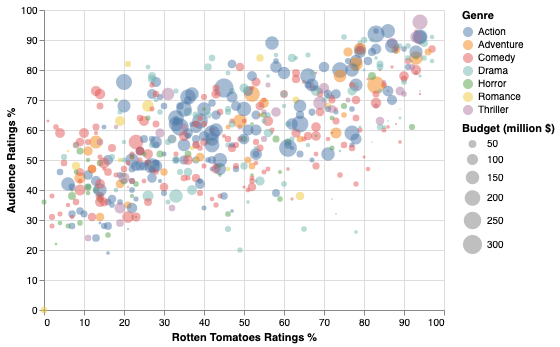

In [21]:
selection = alt.selection_single()
alt.Chart(df).mark_point(filled=True).encode(
    alt.X('Rotten Tomatoes Ratings %:Q', scale=alt.Scale(zero=False)), #specifying data type by Q (quantity)
    alt.Y('Audience Ratings %:Q',scale=alt.Scale(zero=False)),
    alt.Size('Budget (million $):Q'), #adding size to denote budget
    alt.Color('Genre:N'), #adding color dimension, data type is Nominal (categories name)
    alt.OpacityValue(0.5), #increasing opacity to enhance visual, mark_point(filled=True) fills the color
    tooltip=[alt.Tooltip('Genre:N'), #adding tooltip to showcase info at each point
            alt.Tooltip('Film')
            ]
    #,color=alt.condition(selection, 'cluster:N', alt.value('grey'))
    
).add_selection(selection)

In [22]:
selection = alt.selection_single()
chart=alt.Chart(df).mark_point(filled=True).encode(
    alt.X('Rotten Tomatoes Ratings %:Q', scale=alt.Scale(zero=False)), #specifying data type by Q (quantity)
    alt.Y('Audience Ratings %:Q',scale=alt.Scale(zero=False)),
    alt.Size('Budget (million $):Q'), #adding size to denote budget
    #alt.Color(selection,'Genre:N', alt.value('grey')), #adding color dimension, data type is Nominal (categories name)
    alt.OpacityValue(0.5), #increasing opacity to enhance visual, mark_point(filled=True) fills the color
    tooltip=[alt.Tooltip('Genre:N'), #adding tooltip to showcase info at each point
            alt.Tooltip('Film')
            ]
    ,color=alt.condition(selection, 'Genre:N', alt.value('grey'))
).add_selection(selection)

In [26]:
#!datapane login --server=https://datapane.com/ --token=1a8fb60afbd7fc224d02430ebddf78017a8d2ed5 #ac3fc034a65fd8a9322baabe08ad75cf82133089

In [24]:
# Scripts to create df and chart
# Once you have the df and chart, simply use
report = dp.Report(
    dp.Markdown('My second report'), #add description to the report
    dp.Table(df), #create a table
    dp.Plot(chart) #create a chart
)
#report.save(path='movie_report.html',open=True)

In [25]:
#Publish your report . Make sure to have visibility = public if you want to share it
report.publish(name='stock_report4', visibility='PUBLIC',title='Second report')

00:25:40 [INFO ] Uploading assets for Report
00:25:40 [INFO ] Uploading /Users/anshulsaxena/Dropbox/Online Courses/Data Science AI Machine Learning/A-Z_Python_for_Data_Science/dp-tmp-8l8bss0g/dp-tmp-eritznhm.arrow
00:25:44 [INFO ] Uploading /Users/anshulsaxena/Dropbox/Online Courses/Data Science AI Machine Learning/A-Z_Python_for_Data_Science/dp-tmp-8l8bss0g/dp-tmp-8zef5vz_.vl.json
00:25:48 [INFO ] Report published to Datapane as https://datapane.com/anshul6/reports/stock_report4_b3b82eb8/


In [75]:
# Deploying the script for others to generate report by themselves
#!datapane script deploy --script=DataVisualizer.ipynb --name=movie_report

-22:38:59 [INFO ] Built bundle: /var/folders/rm/jqmp7jd579l7s2k4wxp1p25m0000gp/T/datapane-temp-bundle-o7x3usy4.tar.gz
\22:39:00 [INFO ] Uploading /var/folders/rm/jqmp7jd579l7s2k4wxp1p25m0000gp/T/datapane-temp-bundle-o7x3usy4.tar.gz
|Uploaded DataVisualizer.py to https://datapane.com/anshul6/scripts/movie_report/
